<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/teoriepruzkumu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teorie průzkumu

## Úvaha

Představte si, že máte prostor rozdělený na dvě části. Zvolíte si jednu část, kterou zkontrolujete. Protivník si taktéž zvolí část, kde bude přítomen. V případě, kdy zvolíte stejný prostor, vyhráváte, v opačném případě prohráváte.



$$max\{v:A^Tx^B- \begin{pmatrix}v \\
v \\
\vdots \\
v
\end{pmatrix} \ge 0, \sum_{i=1}^nx_i^B=1,x^B \ge 0, v \in R\}$$

## Pravděpodobnost setkání

https://www.mathpages.com/home/kmath124/kmath124.htm

Mějme dvě náhodné proměnné s rovnoměrným rozdělením pravděpodobností na intervalu $<0;1>$. Jaká je pravděpodobnost, že jejich hodnoty jsou od sebe vzdálené maximálně $q$? 

$$P_2=q-q^2$$





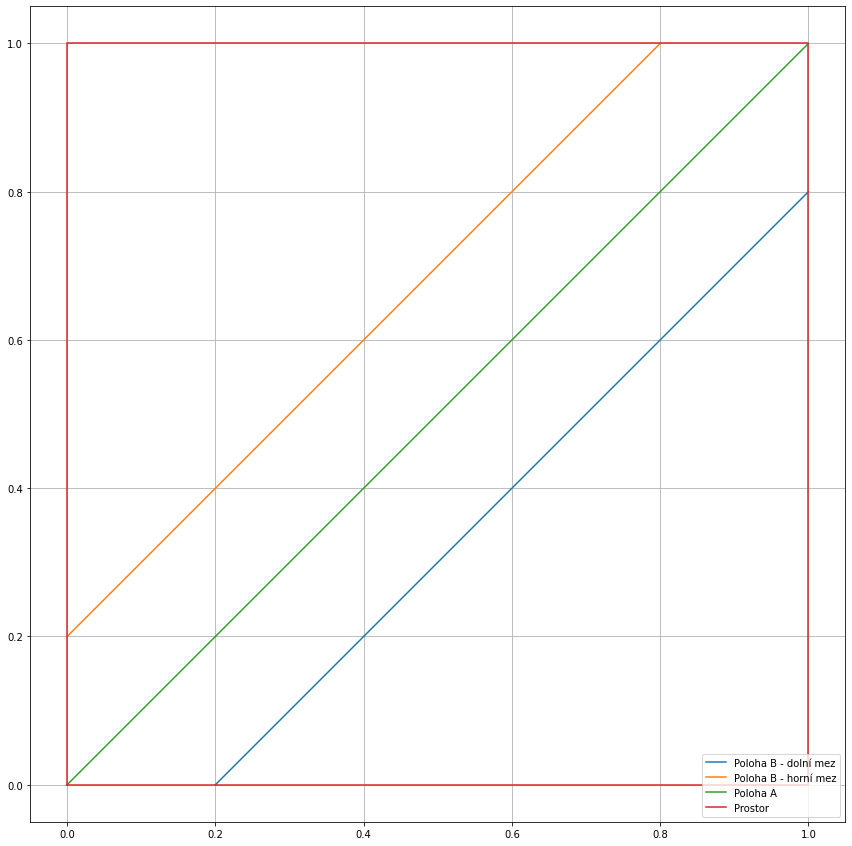

In [21]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 15)
                                  
def drawPicture(q):
  a = {'x': [q, 1], 'y': [0, 1 - q]}
  b = {'x': [0, 1 - q], 'y': [q, 1]}
  c = {'x': [0, 1], 'y': [0, 1]}
  d = {'x': [0, 1, 1, 0, 0], 'y': [0, 0, 1, 1, 0]}
  all = [a, b, c, d]
  for i in all:
    plt.plot(i['x'], i['y'])
  plt.legend(['Poloha B - dolní mez', 'Poloha B - horní mez', 'Poloha A', 'Prostor'], loc='lower right')
  plt.grid('both')
  plt.gca().set_aspect('equal')

drawPicture(0.2)

Zobecněný vztah pro $n$ náhodných proměnných je

$$P_n=nq^{n-1}-(n-1)q^n$$

In [22]:
import random
from math import sqrt

def randomPoint():
  return random.random(), random.random()

def twoPointsIn(distance):
  a = randomPoint()
  b = randomPoint()
  deltaX = a[0] - b[0]
  deltaY = a[1] - b[1]
  return sqrt(deltaX * deltaX + deltaY * deltaY) < distance

def simProbability(count, func):
  sum = 0
  for i in range(count):
    if func():
      sum += 1
  return sum / count

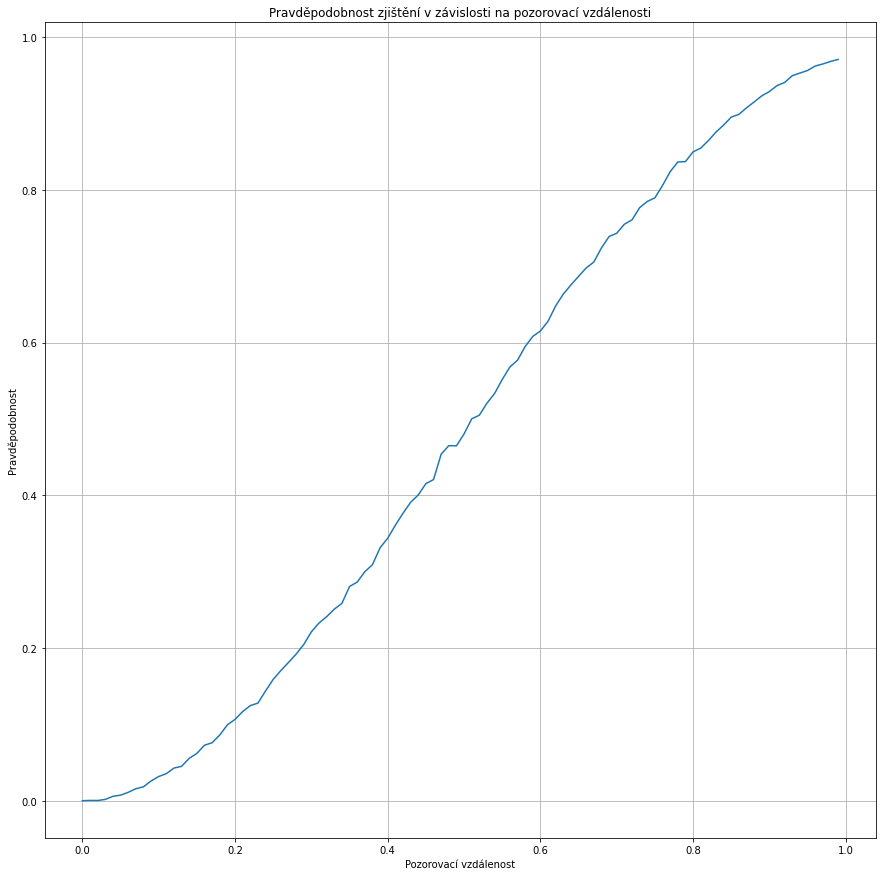

In [37]:
def simIt():
  xx = []
  yy = []

  count = 100
  for i in range(count):
    x = i / count
    func = lambda : twoPointsIn(x)
    probability = simProbability(10000, func)
    xx.append(x)
    yy.append(probability)
  
  plt.plot(xx, yy)
  plt.grid('both')
  plt.gca().set_aspect('equal')
  plt.title('Pravděpodobnost zjištění v závislosti na pozorovací vzdálenosti')
  plt.xlabel('Pozorovací vzdálenost')
  plt.ylabel('Pravděpodobnost')

simIt()  

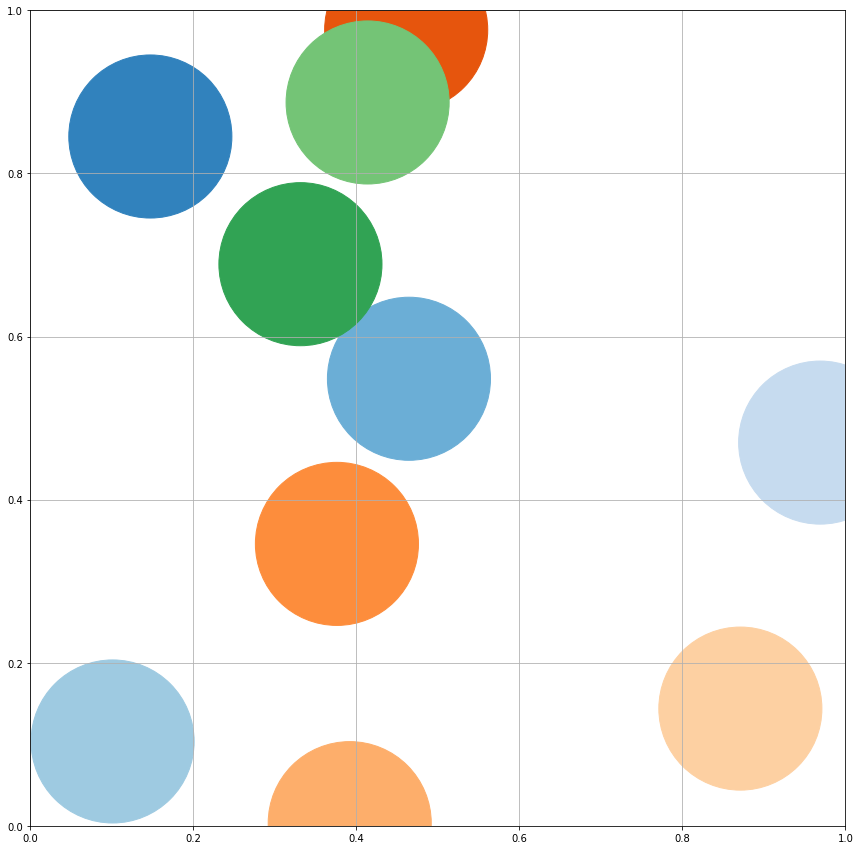

In [33]:
from cycler import cycler

def plotPoints(count, size):
  figure, axes = plt.subplots()

  colors = iter(cycler("color", plt.cm.tab20c.colors))
  for i in range(count):
    a = randomPoint()
    color = next(colors)
    draw_circle = plt.Circle(a, size, **color)
    axes.add_artist(draw_circle)

  axes.set_aspect(1)
  plt.grid('both')
  plt.show()

plotPoints(10, 0.1)  

In [ ]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots()
draw_circle = plt.Circle((0.5, 0.5), 0.3)

axes.set_aspect(1)
axes.add_artist(draw_circle)
plt.title('Circle')
plt.show()